## Correlospinmatrix detector example
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/correlospinmatrix_detector_two_neuron.html

### Reference
* Ginzburg and Sompolinsky (1994). Theory of correlations in stochastic neural networks. 50(4) p. 3175. Fig. 1.

In [1]:
import matplotlib.pyplot as plt
import nest
import numpy as np



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[admin:1834073] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/650772480/shared_mem_cuda_pool.admin could be created.
[admin:1834073] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:

m_x = 0.5
tau_m = 10.0
h = 0.1
T = 1000000.0
tau_max = 100.0

csd = nest.Create("correlospinmatrix_detector")
csd.set(N_channels=2, tau_max=tau_max, Tstart=tau_max, delta_tau=h)

n1 = nest.Create("ginzburg_neuron")
n1.set(theta=0.0, tau_m=tau_m, c_1=0.0, c_2=2.0 * m_x, c_3=1.0)

n2 = nest.Create("mcculloch_pitts_neuron")
n2.set(theta=0.5, tau_m=tau_m)

In [3]:

nest.Connect(n1, n2, syn_spec={"weight": 1.0})

nest.Connect(n1, csd, syn_spec={"receptor_type": 0})
nest.Connect(n2, csd, syn_spec={"receptor_type": 1})

nest.Simulate(T)

count_covariance = csd.count_covariance

mean_activities = np.zeros(2, dtype=float)
for i in range(2):
    mean_activities[i] = count_covariance[i][i][int(tau_max / h)] * (h / T)

print("mean activities =", mean_activities)

covariance_matrix = np.zeros((2, 2, int(2 * tau_max / h) + 1), dtype=float)
for i in range(2):
    for j in range(2):
        covariance_matrix[i, j] = count_covariance[i][j] * (h / T) - mean_activities[i] * mean_activities[j]

ts = np.arange(-tau_max, tau_max + h, h)


Oct 08 13:22:35 NodeManager::prepare_nodes [Info]: 
    Pmean activities = [0.5034339 0.504757 ]
reparing 3 nodes for simulation.

Oct 08 13:22:35 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1e+06
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 08 13:22:37 SimulationManager::run [Info]: 
    Simulation finished.


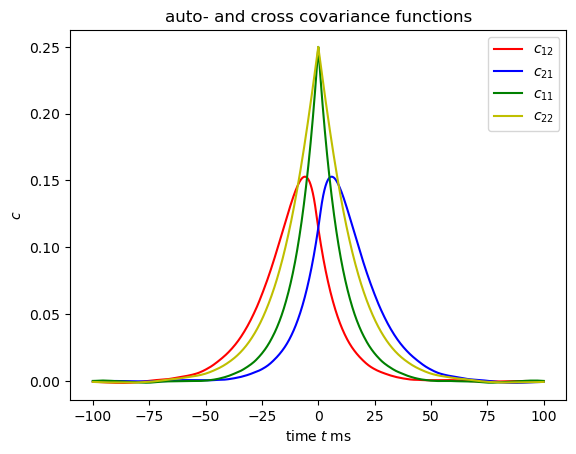

In [4]:

plt.title("auto- and cross covariance functions")

plt.plot(ts, covariance_matrix[0, 1], "r", label=r"$c_{12}$")
plt.plot(ts, covariance_matrix[1, 0], "b", label=r"$c_{21}$")
plt.plot(ts, covariance_matrix[0, 0], "g", label=r"$c_{11}$")
plt.plot(ts, covariance_matrix[1, 1], "y", label=r"$c_{22}$")
plt.xlabel(r"time $t \; \mathrm{ms}$")
plt.ylabel(r"$c$")
plt.legend()

plt.show()